In [171]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [215]:
# Load player history (training data)
# df_train = pd.read_csv('data/during-season/player_history.csv', parse_dates=['kickoff_time'])
df_train = pd.read_csv('data/during-season/player_history.csv',
                       dtype={'element': str, 'opponent_team': str})
df_train.head(5).T

,0,1,2,3,4
element,1,2,3,4,5
fixture,6,6,6,6,6
opponent_team,10,10,10,10,10
total_points,6,0,0,0,7
was_home,False,False,False,False,False
kickoff_time,2022-04-03T15:30:00Z,2022-04-03T15:30:00Z,2022-04-03T15:30:00Z,2022-04-03T15:30:00Z,2022-04-03T15:30:00Z
team_h_score,0,0,0,0,0
team_a_score,1,1,1,1,1
round,1,1,1,1,1
minutes,90,0,0,0,90


In [216]:
df_train[df_train["element"] == 252]

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,crosses,key_passes,big_chances_created,clearances_blocks_interceptions,recoveries,value,transfers_balance,selected,transfers_in,transfers_out


In [217]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   element                          430 non-null    object
 1   fixture                          430 non-null    int64 
 2   opponent_team                    430 non-null    object
 3   total_points                     430 non-null    int64 
 4   was_home                         430 non-null    bool  
 5   kickoff_time                     430 non-null    object
 6   team_h_score                     430 non-null    int64 
 7   team_a_score                     430 non-null    int64 
 8   round                            430 non-null    int64 
 9   minutes                          430 non-null    int64 
 10  goals_scored                     430 non-null    int64 
 11  assists                          430 non-null    int64 
 12  clean_sheets                     430

In [218]:
df_tmp = df_train.copy()
df_tmp.columns

Index(['element', 'fixture', 'opponent_team', 'total_points', 'was_home',
       'kickoff_time', 'team_h_score', 'team_a_score', 'round', 'minutes',
       'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'own_goals', 'attacking_bonus', 'defending_bonus',
       'winning_goals', 'crosses', 'key_passes', 'big_chances_created',
       'clearances_blocks_interceptions', 'recoveries', 'value',
       'transfers_balance', 'selected', 'transfers_in', 'transfers_out'],
      dtype='object')

In [220]:
df_tmp[df_tmp["element"] == "252"]

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,crosses,key_passes,big_chances_created,clearances_blocks_interceptions,recoveries,value,transfers_balance,selected,transfers_in,transfers_out
251,252,7,16,14,True,2022-04-04T17:10:00Z,3,1,1,89,...,0,2,0,2,2,100,0,11215,0,0


In [221]:
df_tmp = df_tmp[['element', 'opponent_team', 'was_home', 'total_points']]

In [222]:
df_tmp.shape

(430, 4)

In [223]:
df_tmp[df_tmp["element"] == "252"]

,element,opponent_team,was_home,total_points
251,252,16,True,14


In [224]:
df_tmp.isna().sum()

element          0
opponent_team    0
was_home         0
total_points     0
dtype: int64

In [225]:
df_tmp = df_tmp.dropna()

In [226]:
df_tmp.isna().sum()

element          0
opponent_team    0
was_home         0
total_points     0
dtype: int64

In [227]:
df_tmp[df_tmp["element"] == "252"]

,element,opponent_team,was_home,total_points
251,252,16,True,14


In [228]:
%%time
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=1234)

df_tmp_X = df_tmp.drop("total_points", axis=1)
df_tmp_Y = df_tmp["total_points"]
model.fit(df_tmp_X, df_tmp_Y)

CPU times: user 129 ms, sys: 55.4 ms, total: 185 ms
Wall time: 107 ms


RandomForestRegressor(n_jobs=-1, random_state=1234)

In [229]:
def plot_features(columns, importances):
    df = (pd.DataFrame({'features': columns, 'feature_importances': importances})
          .sort_values('feature_importances', ascending=False))
    
    fig, ax = plt.subplots()
    ax.barh(df['features'], df['feature_importances'])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

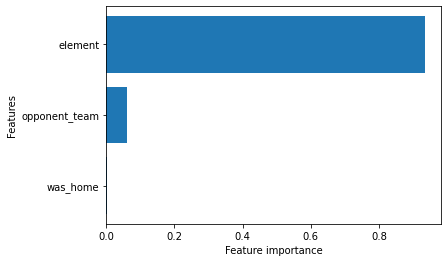

In [230]:
plot_features(df_tmp_X.columns, model.feature_importances_)

In [231]:
df_tmp_X.shape

(430, 3)

In [232]:
df_tmp_X.sample(5)

,element,opponent_team,was_home
274,275,13,True
197,198,14,True
282,283,1,True
303,304,6,False
165,166,18,True


In [233]:
df_tmp_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 429
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   element        430 non-null    object
 1   opponent_team  430 non-null    object
 2   was_home       430 non-null    bool  
dtypes: bool(1), object(2)
memory usage: 10.5+ KB


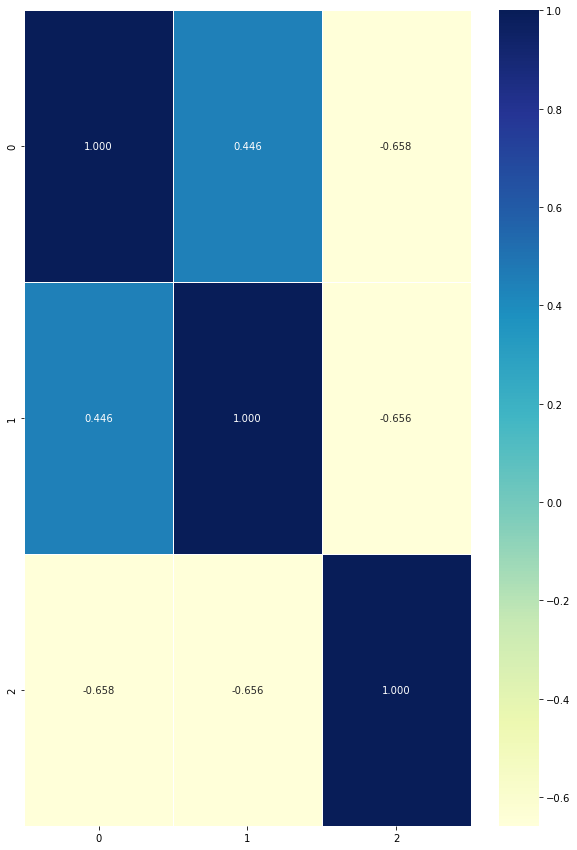

In [234]:
import numpy as np
from scipy.cluster import hierarchy as hc

def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = sp.stats.spearmanr(df).correlation
    
    fix, ax = plt.subplots(figsize=(10, 15))
    ax = sns.heatmap(corr, annot=True, linewidths=0.5, fmt='.3f', cmap='YlGnBu')
    plt.show()
    
cluster_columns(df_tmp_X)

In [235]:
from scipy.cluster.hierarchy import dendrogram, linkage

def cluster_columns(df):
    print(df.shape)
    linked = linkage(df)
    print(linked.shape)
    
    
cluster_columns(df_tmp_X)

(430, 3)
(429, 4)


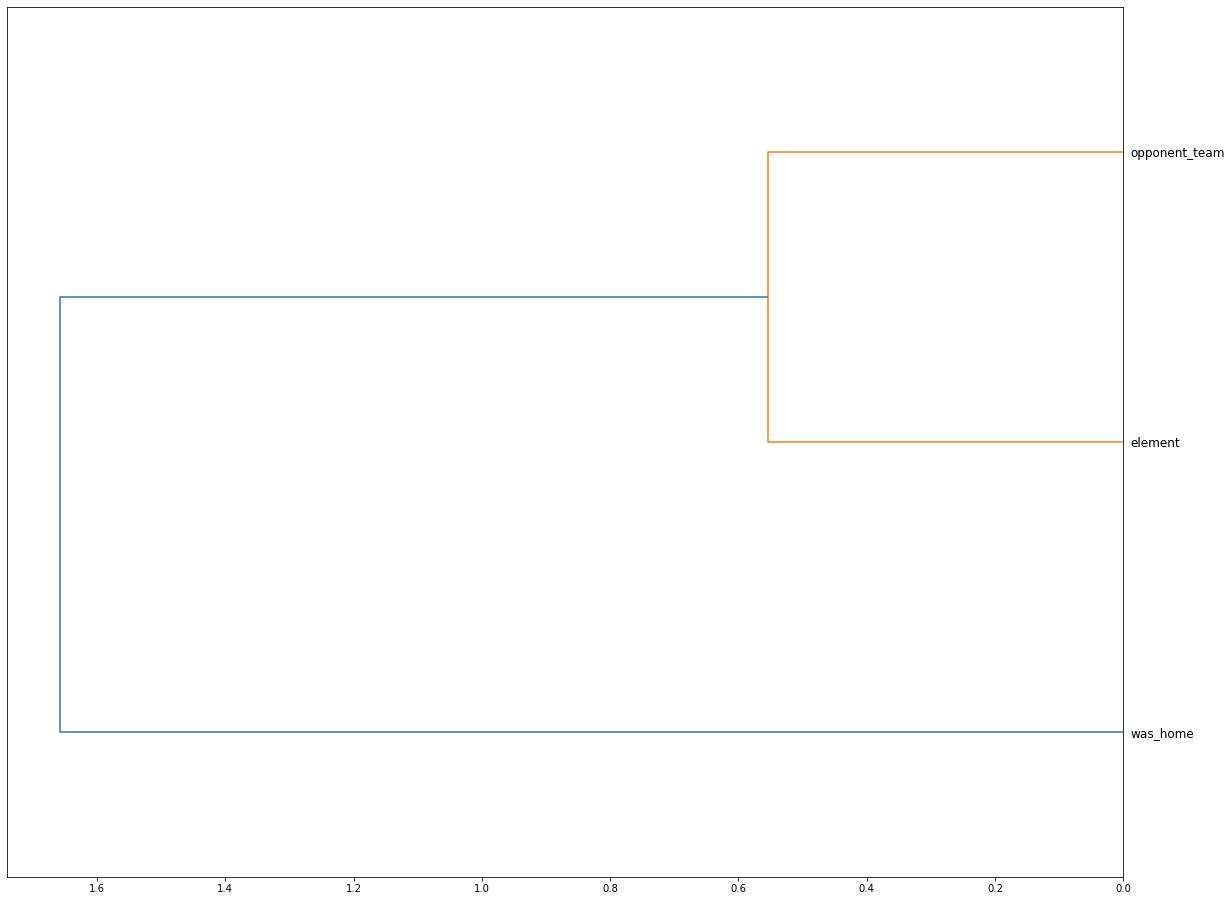

In [236]:
import numpy as np
import scipy as sp
from scipy.cluster import hierarchy as hc
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram


def cluster_columns(df, figsize=(20,16), font_size=12):
    corr = np.round(sp.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()
    
cluster_columns(df_tmp_X)

## Predict

In [238]:
df_test = pd.DataFrame({"element": ["1", "225", "252", "252", "252", "123"], 
                        "opponent_team": ["5", "6", "6", "9", "9", "2"],
                        "was_home": [True, True, True, True, False, False]})
df_test

,element,opponent_team,was_home
0,1,5,True
1,225,6,True
2,252,6,True
3,252,9,True
4,252,9,False
5,123,2,False


In [239]:
model.predict(df_test)

array([ 4.16, 11.91,  3.1 ,  3.08,  3.03,  0.45])

In [240]:
df_tmp_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 429
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   element        430 non-null    object
 1   opponent_team  430 non-null    object
 2   was_home       430 non-null    bool  
dtypes: bool(1), object(2)
memory usage: 10.5+ KB
